In [21]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [22]:
df = pd.read_csv('2010-2021.csv')

In [23]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)

In [24]:
df.info

<bound method DataFrame.info of       Day  Month  Year  Value
0       1      1  2000  17.56
1       2      1  2000  17.47
2       3      1  2000  17.20
3       4      1  2000  16.99
4       5      1  2000  16.97
...   ...    ...   ...    ...
7756   27      3  2021  28.92
7757   28      3  2021  29.09
7758   29      3  2021  30.19
7759   30      3  2021  30.21
7760   31      3  2021  30.55

[7761 rows x 4 columns]>

In [25]:
df.describe()

Day        Month         Year        Value
count  7761.000000  7761.000000  7761.000000  7761.000000
mean     15.728643     6.470043  2010.127561    25.450316
std       8.800206     3.464163     6.135221     4.386569
min       1.000000     1.000000  2000.000000    10.720000
25%       8.000000     3.000000  2005.000000    22.170000
50%      16.000000     6.000000  2010.000000    27.380000
75%      23.000000     9.000000  2015.000000    28.560000
max      31.000000    12.000000  2021.000000    34.510000

In [26]:
df.dtypes

Day        int64
Month      int64
Year       int64
Value    float64
dtype: object

In [27]:
df['Year'] = df['Year'].apply(lambda x: str(x)[:])
df['Month'] = df['Month'].apply(lambda x: str(x)[:])
df['Day'] = df['Day'].apply(lambda x: str(x)[:])
df['Date'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [28]:
df=df[["Date", "Value"]]

In [29]:
df.head()

Date  Value
0 2000-01-01  17.56
1 2000-01-02  17.47
2 2000-01-03  17.20
3 2000-01-04  16.99
4 2000-01-05  16.97

In [30]:
df.columns = ['ds', 'y']

In [36]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

C:\Users\ajibt\AppData\Local\Temp\ipykernel_9940\1552772240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


ds      y
7756 2021-03-27  28.92
7757 2021-03-28  29.09
7758 2021-03-29  30.19
7759 2021-03-30  30.21
7760 2021-03-31  30.55

<AxesSubplot:xlabel='ds'>

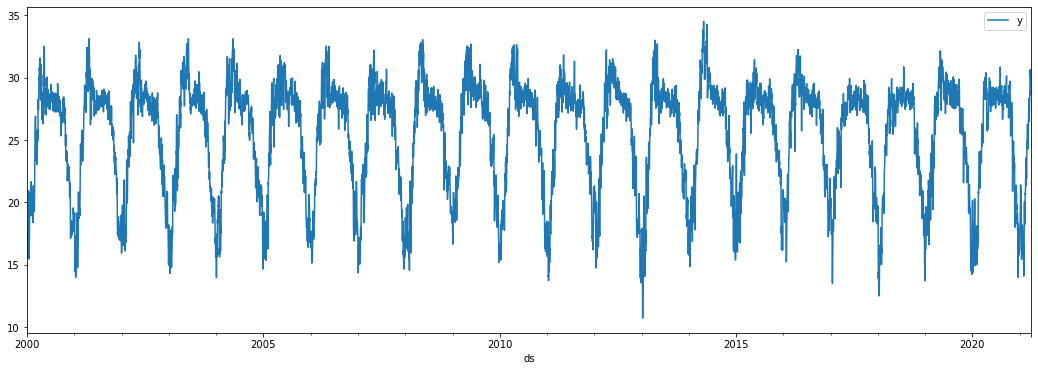

In [37]:
df.plot(x='ds', y='y', figsize=(18,6))

In [38]:
len(df)

7761

In [39]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

In [41]:
m = Prophet()
m.fit(train)
future=m.make_future_dataframe(periods=365)
forecast = m.predict(future)

02:32:33 - cmdstanpy - INFO - Chain [1] start processing
02:32:34 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
forecast.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
7756 2021-03-27  24.726112   25.886922   29.343504    24.630835    24.822276   
7757 2021-03-28  24.725503   25.970274   29.520888    24.630100    24.821983   
7758 2021-03-29  24.724894   26.014207   29.653106    24.629226    24.821691   
7759 2021-03-30  24.724285   26.052480   29.586740    24.628327    24.821383   
7760 2021-03-31  24.723676   26.303692   30.009730    24.627254    24.821072   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
7756        2.855415              2.855415              2.855415 -0.012792   
7757        3.017922              3.017922              3.017922  0.012427   
7758        3.117801              3.117801              3.117801 -0.019461   
7759        3.260252              3.260252              3.260252 -0.002648   
7760        3.388353              3.388353              3.388353  0.006502   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
7756     -0.012792     -0.012792  2.868207      2.868207      2.868207   
7757      0.012427      0.012427  3.005494      3.005494      3.005494   
7758     -0.019461     -0.019461  3.137262      3.137262      3.137262   
7759     -0.002648     -0.002648  3.262900      3.262900      3.262900   
7760      0.006502      0.006502  3.381850      3.381850      3.381850   

      multiplicative_terms  multiplicative_terms_lower  \
7756                   0.0                         0.0   
7757                   0.0                         0.0   
7758                   0.0                         0.0   
7759                   0.0                         0.0   
7760                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
7756                         0.0  27.581527  
7757                         0.0  27.743425  
7758                         0.0  27.842695  
7759                         0.0  27.984537  
7760                         0.0  28.112029

In [44]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
7756 2021-03-27  27.581527   25.886922   29.343504
7757 2021-03-28  27.743425   25.970274   29.520888
7758 2021-03-29  27.842695   26.014207   29.653106
7759 2021-03-30  27.984537   26.052480   29.586740
7760 2021-03-31  28.112029   26.303692   30.009730

In [45]:
test.tail()

ds      y
7756 2021-03-27  28.92
7757 2021-03-28  29.09
7758 2021-03-29  30.19
7759 2021-03-30  30.21
7760 2021-03-31  30.55

In [46]:
plot_plotly(m, forecast)

In [47]:
plot_components_plotly(m, forecast)

In [55]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-365:]['yhat']

In [56]:
print("Root Mean Squared Error between actual and predicted values: ", rmse(predictions, test['y']))
print("Mean Value of the Test Dataset: ", test['y'].mean())

Root Mean Squared Error between actual and predicted values:  1.6558945118741724
Mean Value of the Test Dataset:  25.484465753424637
